## Assignment - Knock Airport Weather
#### Gabriela Domiciano Avellar

 
 - Create a python file or notebook called assignment_6_Weather
 - Get the data from this link - " https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv "
 - Plot:
    - The temperature
    - The mean temperature each day
    - The mean temperature for each month
    - The Windspeed (there is data missing from this column)
    - The rolling windspeed (say over 24 hours)
    - The max windspeed for each day
    - The monthly mean of the daily max windspeeds

 *****************************

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

### soucers: 
- https://www.geeksforgeeks.org/time-series-data-visualization-in-python/?ref=gcse_outind - Time Series Analysis & Visualization in Python

- https://stackoverflow.com/questions/67087338/parsing-an-csv-file-and-plotting-with-python - Parsing a csv file and plotting with Python

- https://www.geeksforgeeks.org/how-to-deal-with-missing-values-in-a-timeseries-in-python/?ref=gcse_outind\ - Dealing with missing values

- https://www.geeksforgeeks.org/8-types-of-plots-for-time-series-analysis-using-python/?ref=gcse_outind - Types of Plots for Time Series

In [163]:


#  CSV file URL
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

#  loading the CSV, ignoring the problematic lines at the beginning
try:
    # Sets the number of lines to skip until reaching useful data
    # Adjust the number if you need to skip more lines.
    df = pd.read_csv(url, skiprows=22, on_bad_lines='skip')  
    
    print("Data loaded successfully from the correct row!!")
    display(df.head())  # Display the first rows of the dataframe
except Exception as e:
    print(f"Error readind csv file: {e}")


Data loaded successfully from the correct row!!


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_2126/3492633691.py:8: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=22, on_bad_lines='skip')


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_2126/3941234777.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12, loc='upper left')


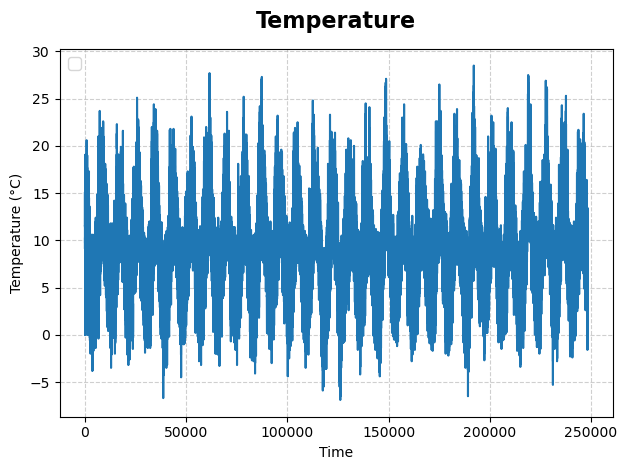

In [164]:
## Plot Temperature.

plt.plot(df['temp'])
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature", fontsize=16, pad=15, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)  
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.savefig('/Users/gabrieladomicianoavellar/Desktop/PFDA_assignments/plot/plot_temperature.png')
plt.show()


In [165]:
temp_day = df[['temp', 'date']]
# Show
print(temp_day)

        temp               date
0       11.5  10-apr-1996 14:00
1       11.5  31-jul-1996 08:00
2       11.6  31-jul-1996 09:00
3       12.9  31-jul-1996 10:00
4       14.5  31-jul-1996 11:00
...      ...                ...
248389  11.6  30-nov-2024 20:00
248390  11.4  30-nov-2024 21:00
248391  10.9  30-nov-2024 22:00
248392  10.8  30-nov-2024 23:00
248393   0.0  01-dec-2024 00:00

[248394 rows x 2 columns]


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_2126/250893861.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


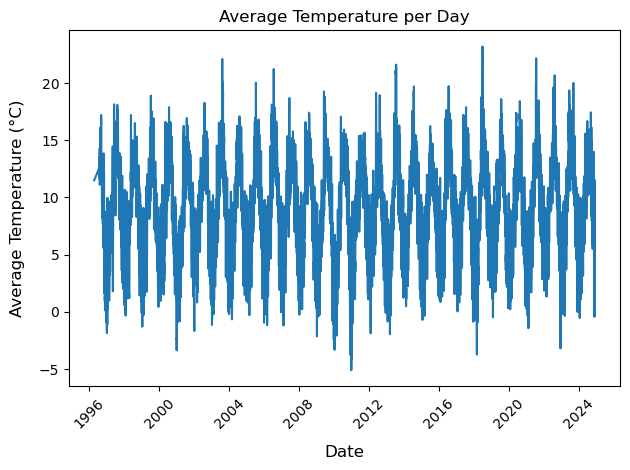

In [166]:

# Plot average temperature per day

df['date'] = pd.to_datetime(df['date'])
daily_mean = df.groupby(df['date'].dt.date)['temp'].mean()
plt.plot(daily_mean.index, daily_mean.values)
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Average Temperature (°C)", fontsize=12, labelpad=10)
plt.title("Average Temperature per Day")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjusts to not overlap labels
plt.savefig('/Users/gabrieladomicianoavellar/Desktop/PFDA_assignments/plot/plot_mean_temperature.png') 
plt.show()


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_2126/4005614388.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df.resample('M', on='date')['temp'].mean()


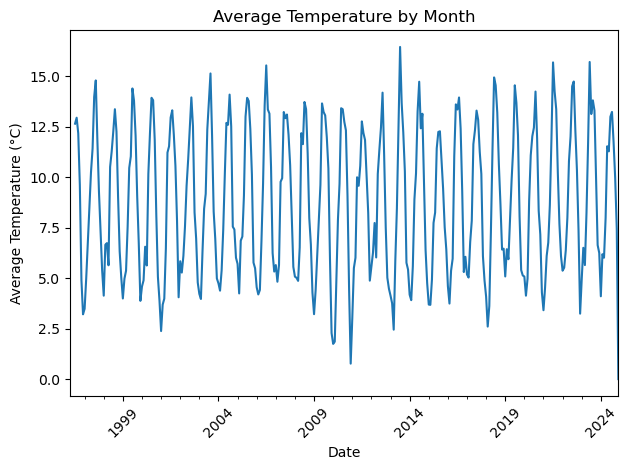

In [167]:


# Group by month and calculate the average temperature
monthly_mean = df.resample('M', on='date')['temp'].mean()

# Plot the average temperature for each month
monthly_mean.plot(title="Average Temperature by Month", ylabel="Average Temperature (°C)", xlabel="Date", rot=45)
plt.tight_layout()  # Adjustment to avoid overlapping labels
plt.savefig('/Users/gabrieladomicianoavellar/Desktop/PFDA_assignments/plot/plot_mean_temperature_monthly.png') 
plt.show()


In [168]:
# Showing DataFrame information.
print(df.info())

# Checking if is missing information
print("\nMissing Values:")
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    248394 non-null  datetime64[ns]
 1   ind     248394 non-null  int64         
 2   rain    248394 non-null  object        
 3   ind.1   248394 non-null  int64         
 4   temp    248394 non-null  float64       
 5   ind.2   248394 non-null  int64         
 6   wetb    248394 non-null  float64       
 7   dewpt   248394 non-null  float64       
 8   vappr   248394 non-null  float64       
 9   rhum    248394 non-null  int64         
 10  msl     248394 non-null  object        
 11  ind.3   248394 non-null  int64         
 12  wdsp    248394 non-null  object        
 13  ind.4   248394 non-null  int64         
 14  wddir   248394 non-null  object        
 15  ww      248394 non-null  object        
 16  w       248394 non-null  object        
 17  sun     248394 non-null  floa

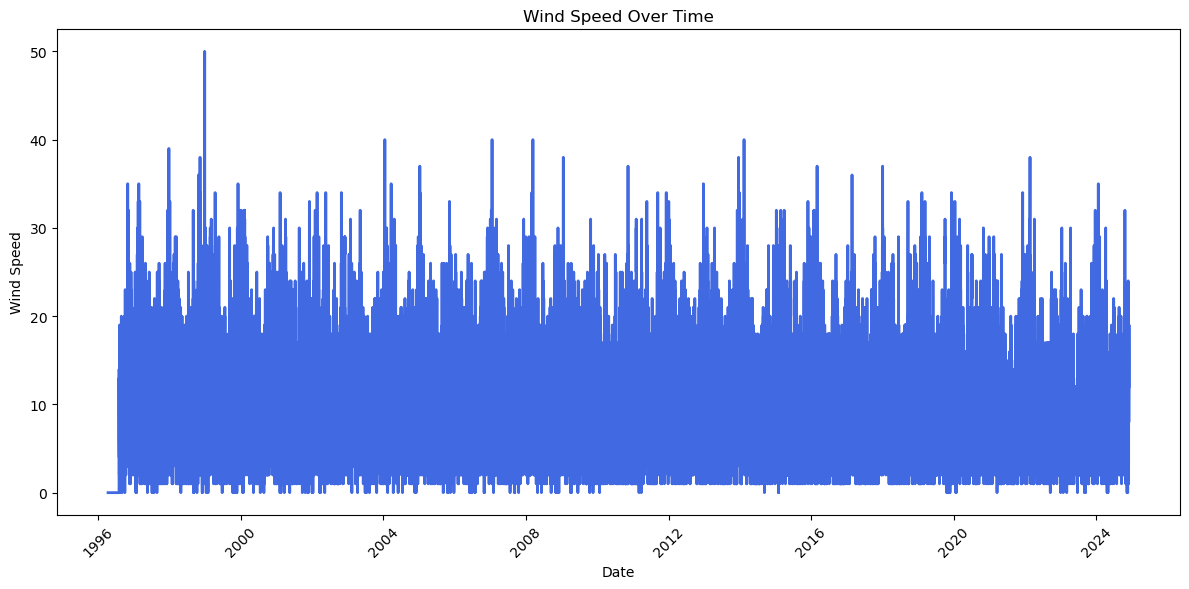

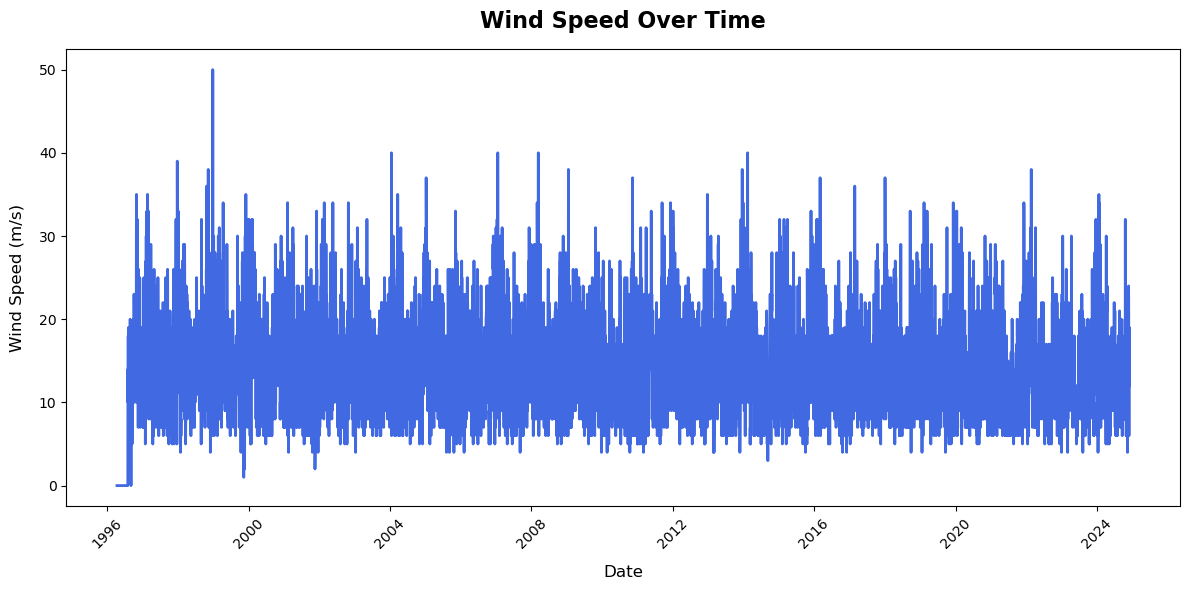

In [169]:

# convert the 'date' column to datetime format if it is not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter to ensure only valid, numeric values ​​are in the 'date' and 'wdsp' columns
df = df.dropna(subset=['date', 'wdsp'])  # Remove lines where 'date' or 'wdsp' are NaN
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')  # Ensures 'wdsp' is numeric
df = df.dropna(subset=['wdsp'])  # Remove lines where 'wdsp' is not numeric

# Plot column 'wdsp' against 'date'
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['wdsp'], color='royalblue', linestyle='-', linewidth=2, marker='', label='Wind Speed')
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Over Time")
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjustment to avoid overlapping labels
plt.savefig('/Users/gabrieladomicianoavellar/Desktop/PFDA_assignments/plot/plot_windspeed.png')
plt.show()


daily_max_wind = df.groupby(df['date'].dt.date)['wdsp'].max()

# Plot the maximum wind speed for each day
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wind.index, daily_max_wind.values, color='royalblue', linestyle='-', linewidth=2, marker='', markersize=4, label='Max Wind Speed')
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Wind Speed (m/s)", fontsize=12, labelpad=10)
plt.title("Wind Speed Over Time", fontsize=16, pad=15, weight='bold') 
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('/Users/gabrieladomicianoavellar/Desktop/PFDA_assignments/plot/plot_max_wind_speed_per_day.png')
plt.show()


End
********************************